<a href="https://colab.research.google.com/github/hhh6593/TIL/blob/master/get_image_file_pr2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [3]:
!ls

get_image_file_pr2.ipynb  light_intel.zip  seg_test  seg_train


In [4]:
!unzip light_intel.zip

Archive:  light_intel.zip
replace seg_test/buildings/20057.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: seg_test/buildings/20057.jpg  
  inflating: seg_test/buildings/20060.jpg  
  inflating: seg_test/buildings/20061.jpg  
  inflating: seg_test/buildings/20064.jpg  
  inflating: seg_test/buildings/20073.jpg  
  inflating: seg_test/buildings/20074.jpg  
  inflating: seg_test/buildings/20078.jpg  
  inflating: seg_test/buildings/20083.jpg  
  inflating: seg_test/buildings/20094.jpg  
  inflating: seg_test/buildings/20096.jpg  
  inflating: seg_test/buildings/20113.jpg  
  inflating: seg_test/buildings/20131.jpg  
  inflating: seg_test/buildings/20140.jpg  
  inflating: seg_test/buildings/20177.jpg  
  inflating: seg_test/buildings/20186.jpg  
  inflating: seg_test/buildings/20206.jpg  
  inflating: seg_test/buildings/20207.jpg  
  inflating: seg_test/buildings/20218.jpg  
  inflating: seg_test/buildings/20228.jpg  
  inflating: seg_test/buildings/20231.jpg  
  inflating: seg

In [5]:
!ls '/content/drive/My Drive/Colab Notebooks/seg_train'

buildings  forest  glacier  mountain  sea  street


In [114]:
train_path = '/content/drive/My Drive/Colab Notebooks/seg_train'
test_path = '/content/drive/My Drive/Colab Notebooks/seg_test'

In [115]:
batch_size=32
img_height=180
img_width=180

In [116]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_path, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='validation') # set as validation data

Found 2400 images belonging to 6 classes.
Found 600 images belonging to 6 classes.


In [117]:
x,y=train_generator[0]

####generator####
(32, 180, 180, 3) (32, 6)


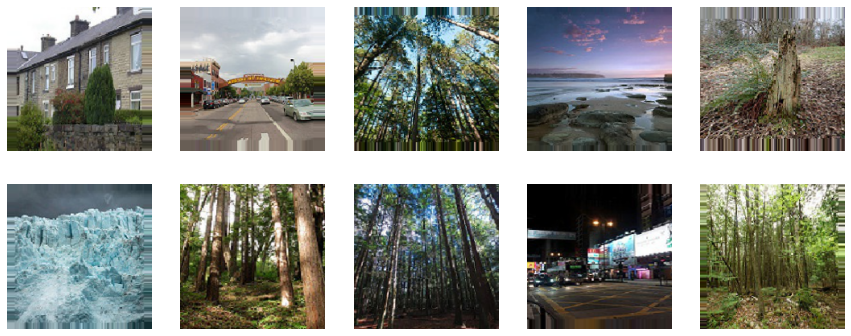

In [118]:
import matplotlib.pyplot as plt
print('####generator####')
for x, y in train_generator:
    print(x.shape, y.shape)
    
    fig, axes = plt.subplots(2, 5)
    fig.set_size_inches(15, 6)
    for i in range(10):
        axes[i//5, i%5].imshow(x[i])
        axes[i//5, i%5].axis('off')
    
    plt.show()
    break

In [119]:
# auto = tf.data.experimental.AUTOTUNE
# train_generator = train_generator.cache().shuffle(1000).prefetch(buffer_size=auto)
# validation_generator = validation_generator.cache().prefetch(buffer_size=auto)

In [120]:
# #모델 만들기
# from tensorflow.keras.models import Sequential
# num_classes = 6
# model = Sequential([
#   # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
#   layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(num_classes)
# ])

In [121]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(256, activation='relu'),
    
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 178, 178, 64)      1792      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 89, 89, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 87, 87, 64)        36928     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 41, 41, 128)       73856     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 18, 18, 128)     

In [122]:
# #모델 컴파일
# model.compile(optimizer='adam',
#               loss=keras.losses.SparseCategoricalCrossentropy(from_logits='True'),
#               metrics=['accuracy'])

In [123]:
# model.summary()

In [124]:
epochs=10
history=model.fit(train_generator, validation_data=validation_generator, epochs=epochs)

Epoch 1/10
75/75 [==============================] - 23s 301ms/step - loss: 1.4743 - accuracy: 0.3605 - val_loss: 1.1723 - val_accuracy: 0.5083
Epoch 2/10
75/75 [==============================] - 22s 295ms/step - loss: 1.0242 - accuracy: 0.5748 - val_loss: 1.0536 - val_accuracy: 0.5733
Epoch 3/10
75/75 [==============================] - 22s 296ms/step - loss: 0.9426 - accuracy: 0.6161 - val_loss: 1.0899 - val_accuracy: 0.5500
Epoch 4/10
75/75 [==============================] - 22s 295ms/step - loss: 0.9495 - accuracy: 0.6152 - val_loss: 0.9629 - val_accuracy: 0.6317
Epoch 5/10
75/75 [==============================] - 22s 296ms/step - loss: 0.8305 - accuracy: 0.6706 - val_loss: 0.9754 - val_accuracy: 0.6367
Epoch 6/10
75/75 [==============================] - 22s 296ms/step - loss: 0.8022 - accuracy: 0.6995 - val_loss: 0.8441 - val_accuracy: 0.6767
Epoch 7/10
75/75 [==============================] - 22s 296ms/step - loss: 0.7914 - accuracy: 0.6933 - val_loss: 0.8591 - val_accuracy: 0.6833

In [125]:
history.history['loss']

[1.2876436710357666,
 1.0259779691696167,
 0.9169684052467346,
 0.8989011645317078,
 0.8278585076332092,
 0.8042604327201843,
 0.7745873332023621,
 0.6943621039390564,
 0.6749131083488464,
 0.6223841309547424]

Text(0.5, 1.0, 'training and validation loss')

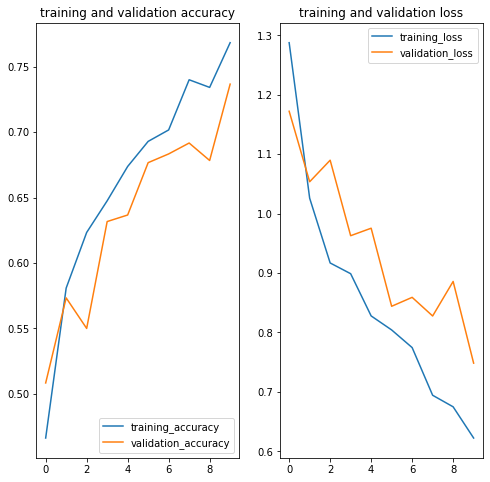

In [126]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = 'training_accuracy')
plt.plot(epochs_range, val_acc, label = 'validation_accuracy')
plt.legend(loc = 'lower right')
plt.title('training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = 'training_loss')
plt.plot(epochs_range, val_loss, label = 'validation_loss')
plt.legend(loc = 'upper right')
plt.title('training and validation loss')

In [105]:
#데이터 증강 - 이미지 데이터를 반전, 필터링, 색변환 등의 전처리를 통해서 더 많은 훈련 데이터를 추가시키는 과정 (과대적합 방지를 위함)
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomFlip('horizontal',
                                                                                   input_shape=(img_height, img_width, 3)),
                                      layers.experimental.preprocessing.RandomRotation(0.1),
                                      layers.experimental.preprocessing.RandomZoom(0.1)])

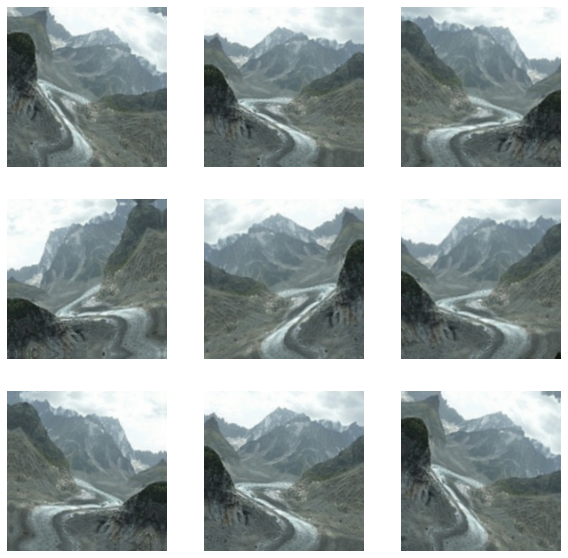

In [106]:
plt.figure(figsize=(10,10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(augmented_images[0].numpy().astype('uint8'))
    plt.axis('off')

In [62]:
#드롭아웃
# model = Sequential([
#   layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
#   layers.Conv2D(16, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Dropout(0.2), #은닉층 노드의 20%를 출력하지 않는다.
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(num_classes)
# ])

In [112]:
# model = tf.keras.models.Sequential([
    
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(180, 180, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
    
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    
#     tf.keras.layers.Dropout(0.2),

#     tf.keras.layers.Flatten(),
    
#     tf.keras.layers.Dense(256, activation='relu'),
    
#     tf.keras.layers.Dense(6, activation='softmax')
# ])

# model.compile(loss = 'categorical_crossentropy',
#               optimizer = 'adam',
#               metrics = ['accuracy'])

# model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 178, 178, 64)      1792      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 89, 89, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 87, 87, 64)        36928     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 41, 41, 128)       73856     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 18, 18, 128)     

In [113]:
# history=model.fit(train_generator, validation_data=validation_generator, epochs=15)

Epoch 1/15
75/75 [==============================] - 23s 301ms/step - loss: 1.5895 - accuracy: 0.3347 - val_loss: 1.2850 - val_accuracy: 0.4800
Epoch 2/15
75/75 [==============================] - 22s 296ms/step - loss: 1.0511 - accuracy: 0.5867 - val_loss: 1.0825 - val_accuracy: 0.5617
Epoch 3/15
75/75 [==============================] - 22s 298ms/step - loss: 0.9787 - accuracy: 0.6202 - val_loss: 1.0456 - val_accuracy: 0.5967
Epoch 4/15
75/75 [==============================] - 22s 298ms/step - loss: 0.9500 - accuracy: 0.6014 - val_loss: 1.0175 - val_accuracy: 0.6150
Epoch 5/15
75/75 [==============================] - 22s 296ms/step - loss: 0.8665 - accuracy: 0.6674 - val_loss: 1.0510 - val_accuracy: 0.5933
Epoch 6/15
75/75 [==============================] - 22s 299ms/step - loss: 0.8699 - accuracy: 0.6727 - val_loss: 0.9524 - val_accuracy: 0.6533
Epoch 7/15
75/75 [==============================] - 22s 297ms/step - loss: 0.7671 - accuracy: 0.6947 - val_loss: 0.8822 - val_accuracy: 0.6783

Text(0.5, 1.0, 'training and validation loss')

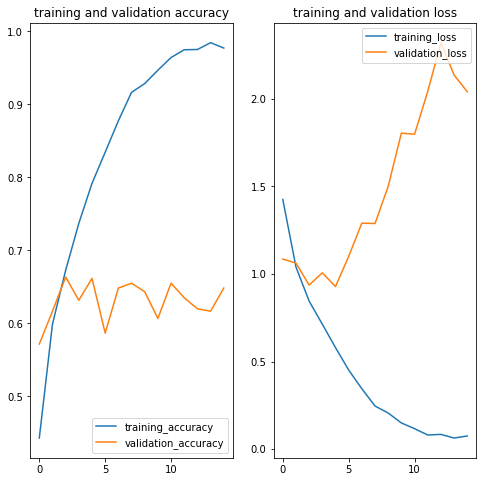

In [66]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(15)

# plt.figure(figsize=(8,8))
# plt.subplot(1,2,1)
# plt.plot(epochs_range, acc, label = 'training_accuracy')
# plt.plot(epochs_range, val_acc, label = 'validation_accuracy')
# plt.legend(loc = 'lower right')
# plt.title('training and validation accuracy')

# plt.subplot(1,2,2)
# plt.plot(epochs_range, loss, label = 'training_loss')
# plt.plot(epochs_range, val_loss, label = 'validation_loss')
# plt.legend(loc = 'upper right')
# plt.title('training and validation loss')